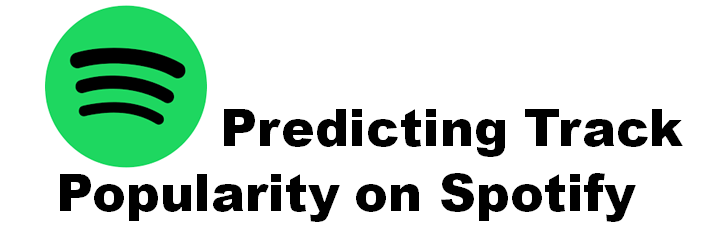


##   *Using Audio Features and Streaming Patterns*

##  **BUSINESS CONTEXT**

### In today's competitive music industry, understanding what makes a song trend is the key to success. Streaming audio services like Spotify, Apple Music, and Deezer are instrumental in driving song trends. Record companies, artists, and agencies rely on data analysis to know which songs to promote, place on playlists, or feature.

### But discovering a hit song prior to it being listed on the charts is not that simple. It used to be intuition or human insight, but with the help of **music analytics**, now there exists an opportunity to apply machine learning to forecast whether a new song is going to be a hit.

## **PROJECT OBJECTIVES**

**Find Hit Song Patterns** – Compare energy, danceability, etc., in hits vs. non-hits.

**Check Categorical Trend**s – See if key, mode, or artist count affects success.

**Clean Data** – Fix missing values (like key) and remove duplicates.

**Visualize Differences** – Use plots (boxplots, bar charts) to spot trends.
**Giving insights **

**Testing Significance** – Use stats (p-values) to confirm if patterns are real.

**Goal:** Help musicians/producers understand what makes songs popular. 🎵

#### Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### Loading the dataset

In [ ]:
df = pd.read_csv('spotify-2023.csv',encoding='latin-1')


## 1- Basic Exploration of data
* 1.1 Checking the top 5 rows
* 1.2 Checking the shape of dataset
* 1.3 Checking the info of dataset
* 1.4 Checking the Statistical summary

#### 1.1 Checking the top 5 rows




In [ ]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


###### Observations:
* Artist pluis collab information is provided .
* Various features of music information is also available .
* Various charts ranking is also provided .


#### 1.2 Checking the shape (no.of rows and columns in dataset)

In [ ]:
df.shape

(953, 24)

###### **Result:**
There are 1581 rows and 14 columns in dataset

#### 1.3 Checking the info of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

### Observation
* There are null values in key and in Shazam charts
* streams coloumn is given as object which can be a problem

In [ ]:
# converting stream to numeric
df['streams'] = df['streams'].astype(str).str.replace(',', '', regex=False)
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

#### 1.4 Statistical summary

In [ ]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.520000e+02,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.141374e+08,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.668569e+08,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.416362e+08,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.905309e+08,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738690e+08,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


## 2-Exploratory Data Analysis (EDA)
* 2.1 Checking the duplicate rows and fetching them
* 2.2 Checking Null Values (columnwise, percentage wise in columns and row-wise
* 2.3 Outliers Analysis
* 2.4 Univariate Analysis
* 2.5 Bivariate Analysis

#### 2.1 Checking the duplicate rows




In [ ]:
# total number of duplicate rows
df.duplicated().sum()

np.int64(0)

In [ ]:
# Fetching duplicate rows
df[df.duplicated()]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%


###### Results:
1.There are no duplicate values .

### 2.2 Checking Null Values

In [ ]:
# Column-wise null values
df.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,1
in_apple_playlists,0


#### Observations
* we have got 50 null values in shazam charts
* 95 null values in key
* 1 null value in key

In [ ]:
# Percentage wise null values in columns
df.isnull().sum()/len(df)*100

,0
track_name,0.000000
artist(s)_name,0.000000
artist_count,0.000000
released_year,0.000000
released_month,0.000000
released_day,0.000000
in_spotify_playlists,0.000000
in_spotify_charts,0.000000
streams,0.104932
in_apple_playlists,0.000000


In [ ]:
# row-wise null values
df.isnull().sum(axis=1).sort_values(ascending=False)

,0
531,2
127,2
532,2
554,2
560,2
...,...
339,0
340,0
341,0
342,0


###### Results:


### 2.3 Outliers Analysis
* 2.3.1 Visualizing outliers
* 2.3.2 Finding the no. of outliers in each column

In [ ]:
# prompt: can you give code to convert the shazam charts coloumn and the deezer playlist coloumn to numeric variable

df['in_shazam_charts'] = df['in_shazam_charts'].astype(str).str.extract('(\d+)').astype(float)
df['in_deezer_playlists'] = df['in_deezer_playlists'].astype(str).str.extract('(\d+)').astype(float)


In [ ]:
threshold = df['streams'].quantile(0.75)
df['hit_status'] = df['streams'].apply(lambda x: 'Hit' if x >= threshold else 'Non-Hit')


In [ ]:
# Fetching the datasets having categorical & Numerical variables seperately
cat_variables= df.select_dtypes('object')
num_variables= df.select_dtypes(['int','float'])

##### 2.3.1 Visualizing outliers

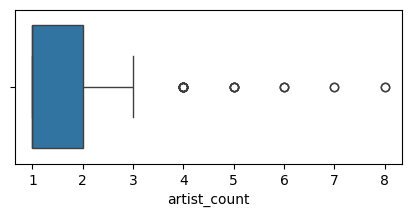

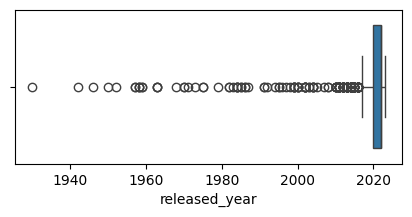

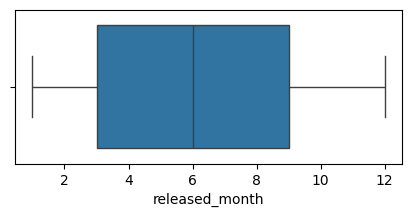

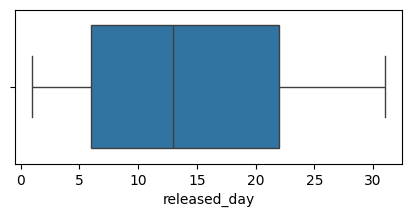

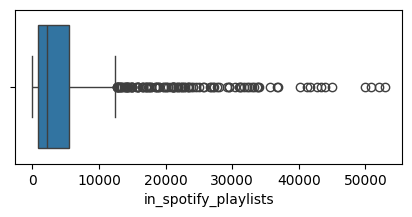

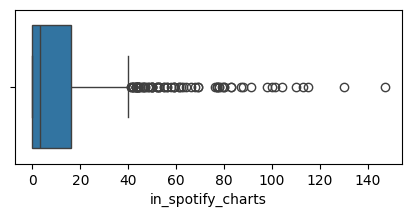

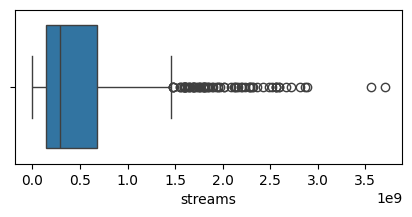

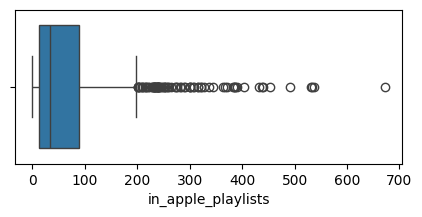

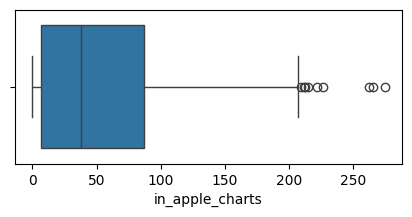

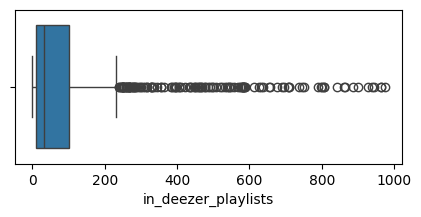

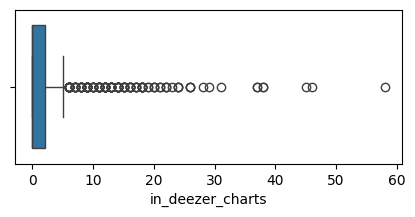

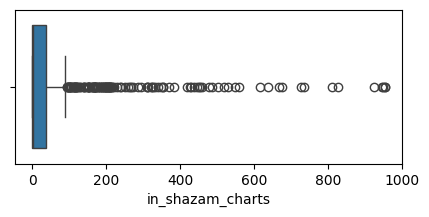

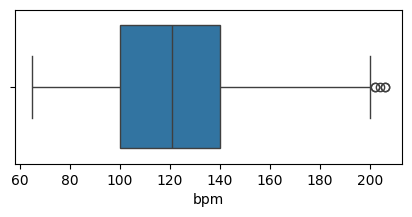

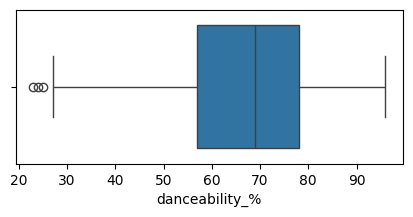

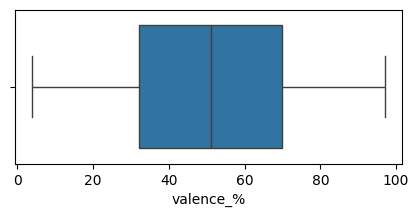

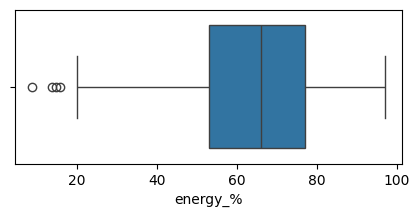

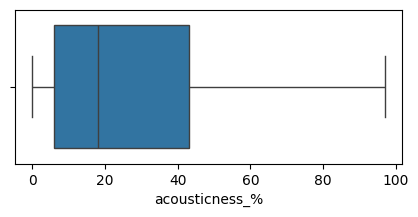

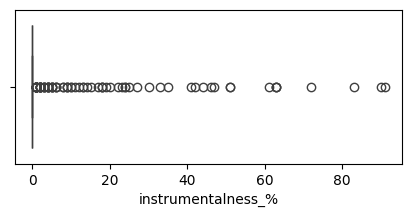

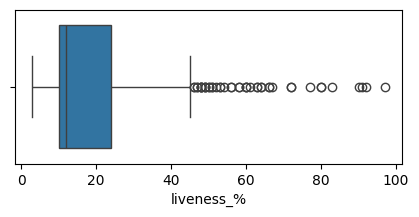

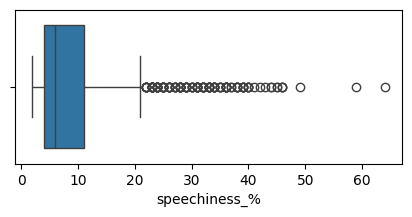

In [ ]:
for i in num_variables:
    plt.figure(figsize=(5,2))
    sns.boxplot(data=df, x=i)


###### Observations:
*



##### 2.3.2 Finding the no. of outliers in each column

In [ ]:
for i in num_variables:
    Q1= np.quantile(df[i],0.25)
    Q3= np.quantile(df[i],0.75)
    IQR= Q3-Q1
    lower_limit= Q1- 1.5*IQR
    upper_limit= Q3+ 1.5*IQR
    print("Number of ouliers in ",i,":", len(df[df[i]>upper_limit]))
    print('-----------------------')

Number of ouliers in  artist_count : 27
-----------------------
Number of ouliers in  released_year : 0
-----------------------
Number of ouliers in  released_month : 0
-----------------------
Number of ouliers in  released_day : 0
-----------------------
Number of ouliers in  in_spotify_playlists : 109
-----------------------
Number of ouliers in  in_spotify_charts : 78
-----------------------
Number of ouliers in  streams : 0
-----------------------
Number of ouliers in  in_apple_playlists : 78
-----------------------
Number of ouliers in  in_apple_charts : 9
-----------------------
Number of ouliers in  in_deezer_playlists : 125
-----------------------
Number of ouliers in  in_deezer_charts : 143
-----------------------
Number of ouliers in  in_shazam_charts : 0
-----------------------
Number of ouliers in  bpm : 5
-----------------------
Number of ouliers in  danceability_% : 0
-----------------------
Number of ouliers in  valence_% : 0
-----------------------
Number of ouliers in 

###### Results:
1.
2.

## 2.4 Univariate Analysis

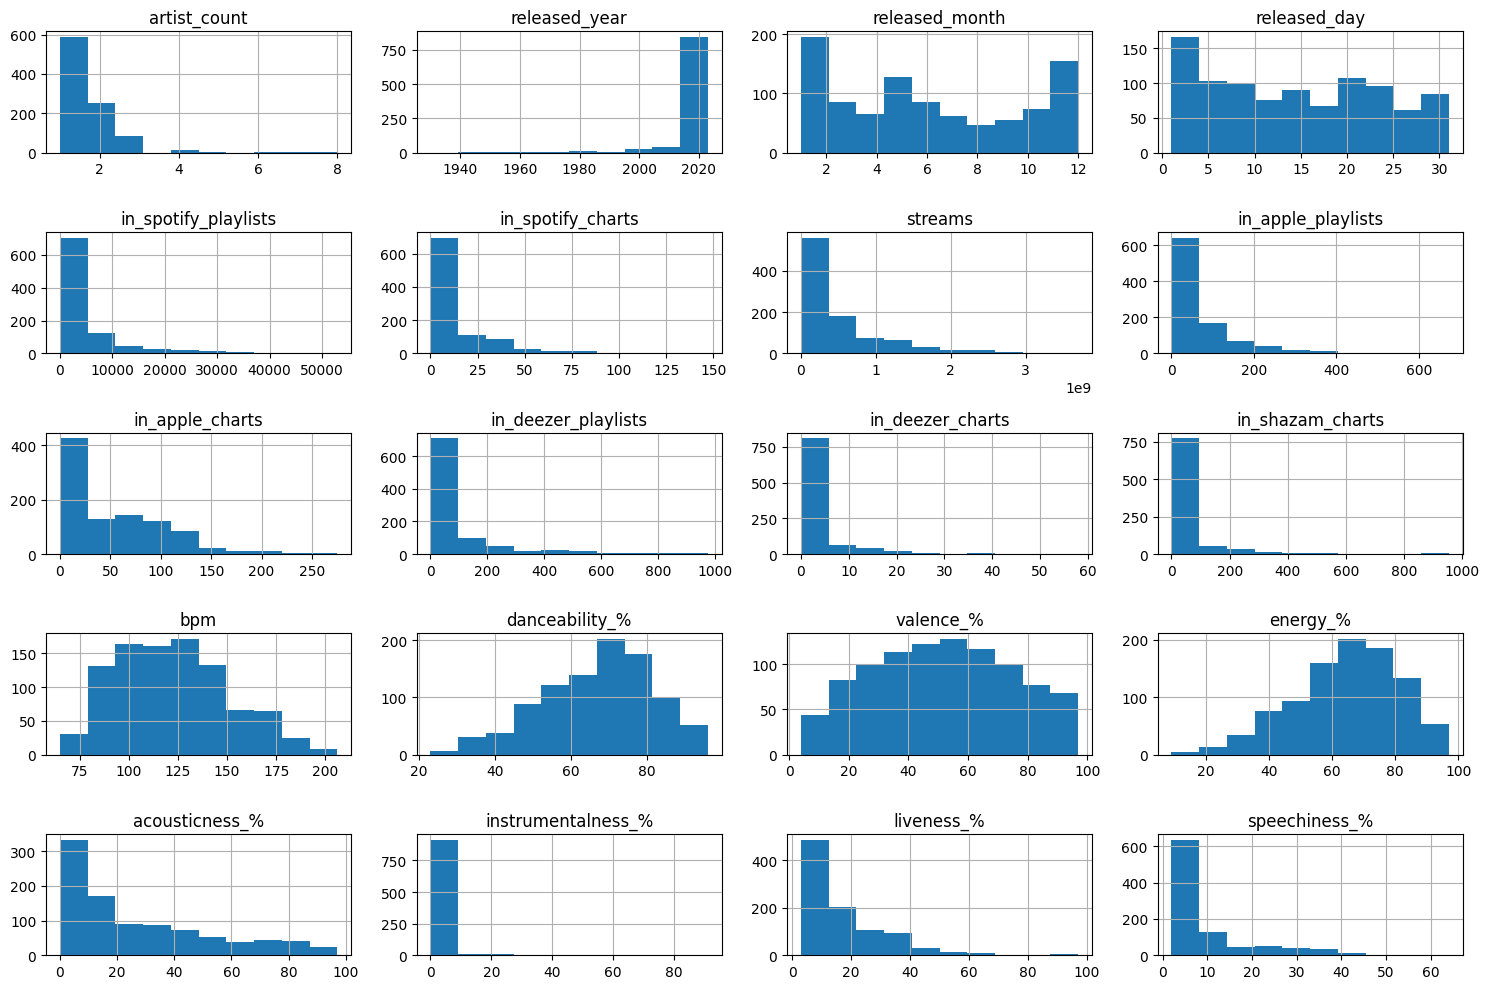

In [ ]:
# prompt: give code for numerical features all to plot their histograms , they are stored under num_ variables
num_variables.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

## 2.4.2  Categorical Variable Visual Analysis

In [ ]:
# prompt: can you give code to print the list of the cat_ variables

cat_variables.columns

Index(['track_name', 'artist(s)_name', 'key', 'mode', 'hit_status'], dtype='object')

/tmp/ipython-input-26-448529294.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette='viridis')


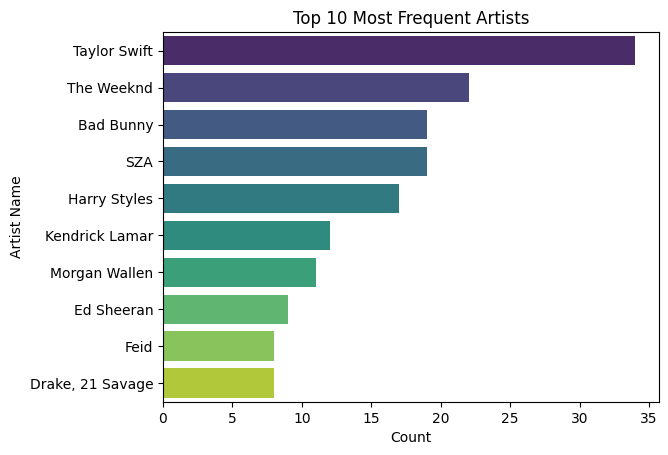

In [ ]:
# Function to plot Top 10 most frequent values for a column
def plot_top_10_categories(column_name, title, xlabel, ylabel):
    top_values = df[column_name].value_counts().nlargest(10)
    sns.barplot(x=top_values.values, y=top_values.index, palette='viridis')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plot for 'artist(s)_name'
plot_top_10_categories(
    column_name='artist(s)_name',
    title='Top 10 Most Frequent Artists',
    xlabel='Count',
    ylabel='Artist Name'
)

/tmp/ipython-input-27-1942048836.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='key', order=key_order, palette='viridis')


Text(0, 0.5, 'Count')

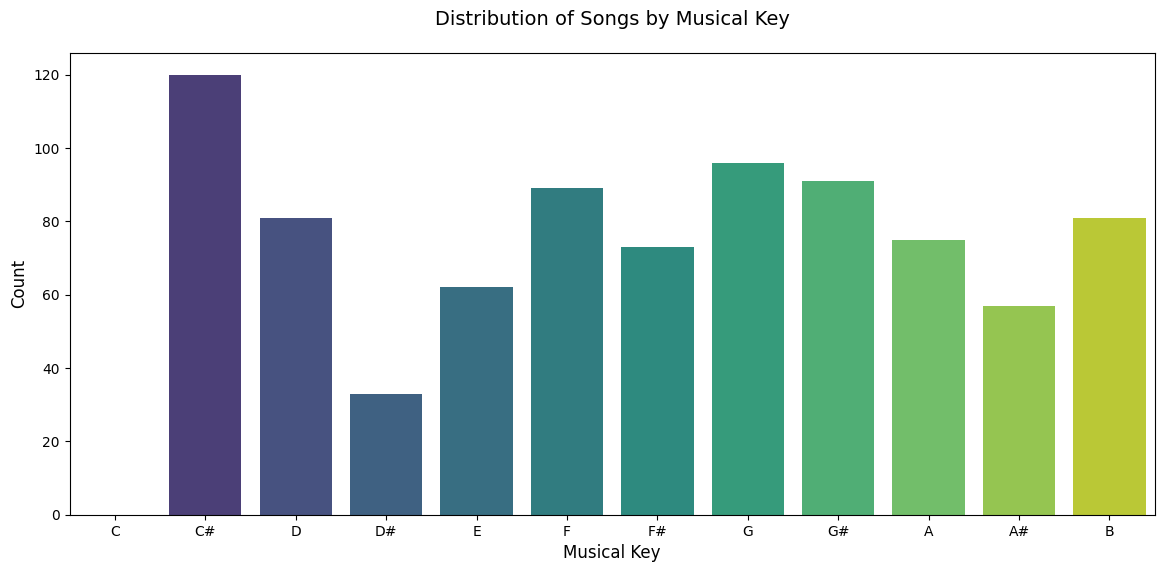

In [ ]:
# 1. Musical Key Analysis
plt.figure(figsize=(14, 6))
key_order = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
ax = sns.countplot(data=df, x='key', order=key_order, palette='viridis')
plt.title('Distribution of Songs by Musical Key', fontsize=14, pad=20)
plt.xlabel('Musical Key', fontsize=12)
plt.ylabel('Count', fontsize=12)

/tmp/ipython-input-28-3017703445.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='mode', palette='coolwarm')


Text(0, 0.5, 'Count')

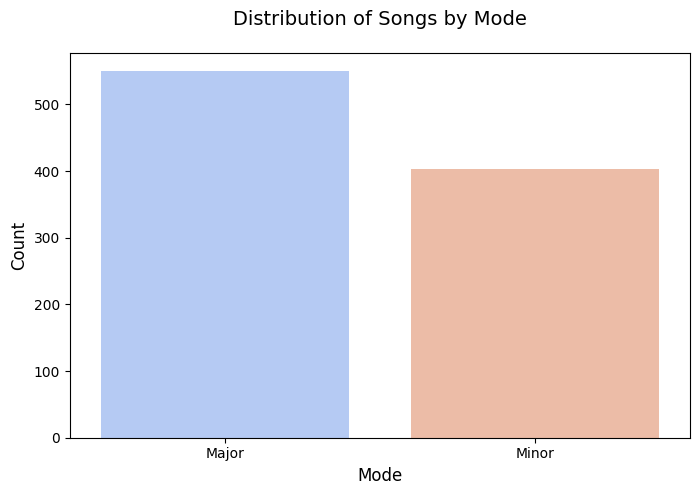

In [ ]:
# 2. Mode Analysis (Major/Minor)
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='mode', palette='coolwarm')
plt.title('Distribution of Songs by Mode', fontsize=14, pad=20)
plt.xlabel('Mode', fontsize=12)
plt.ylabel('Count', fontsize=12)



### 2.5 Bi-variate analysis


##### 2.5.1.1. Numerical vs Hit status visual analysis

In [ ]:
cat_variables.columns

Index(['track_name', 'artist(s)_name', 'key', 'mode', 'hit_status'], dtype='object')

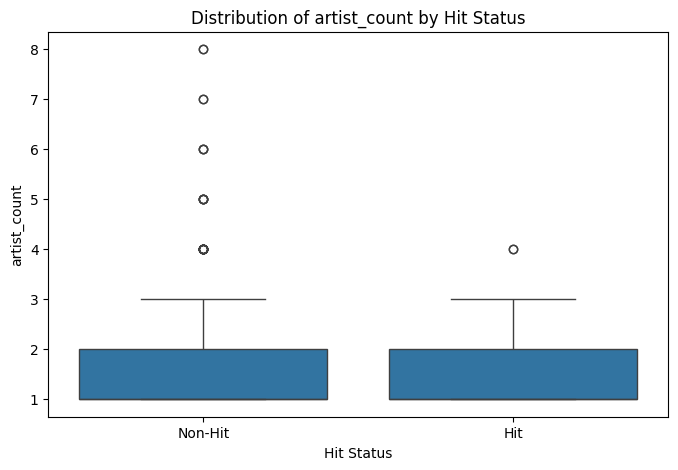

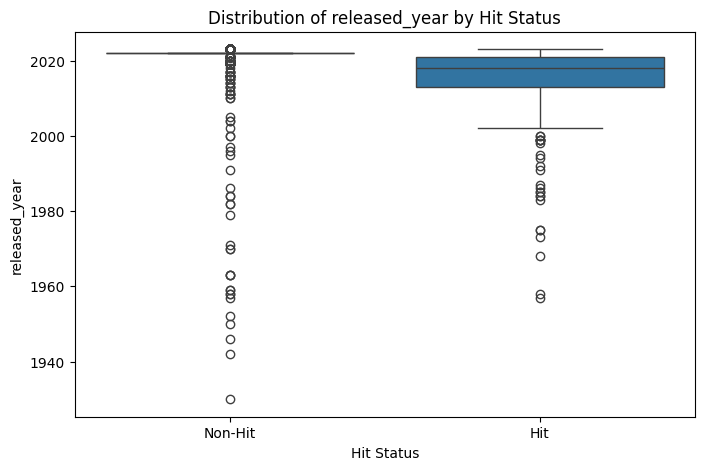

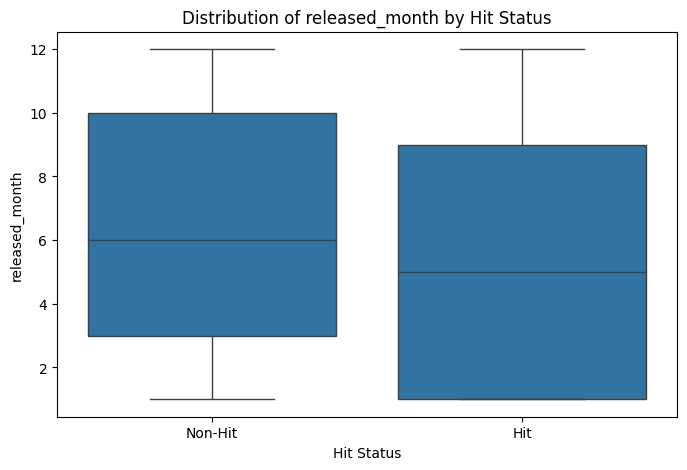

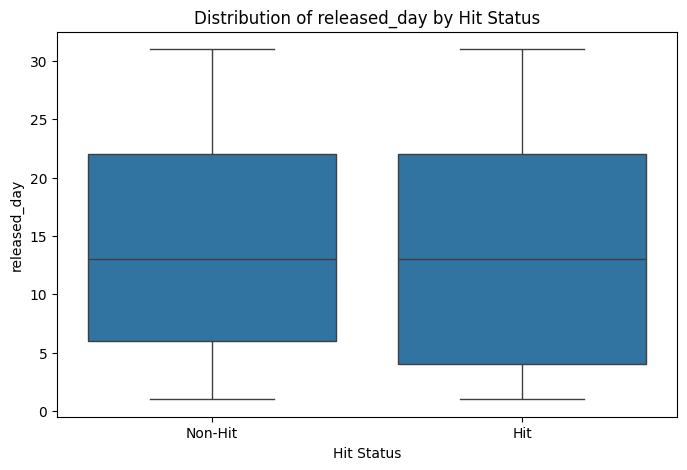

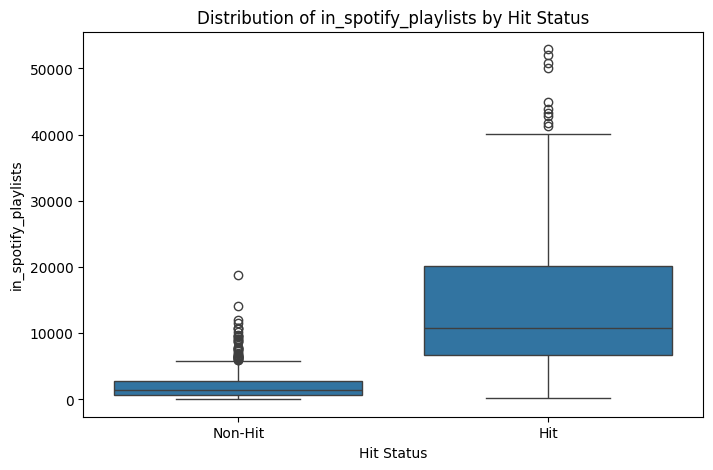

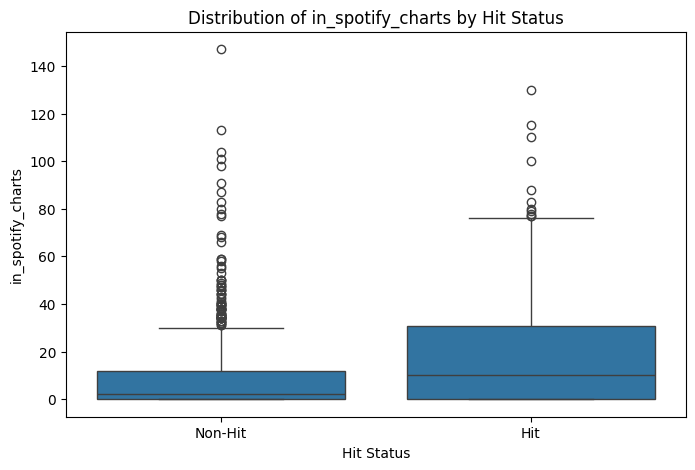

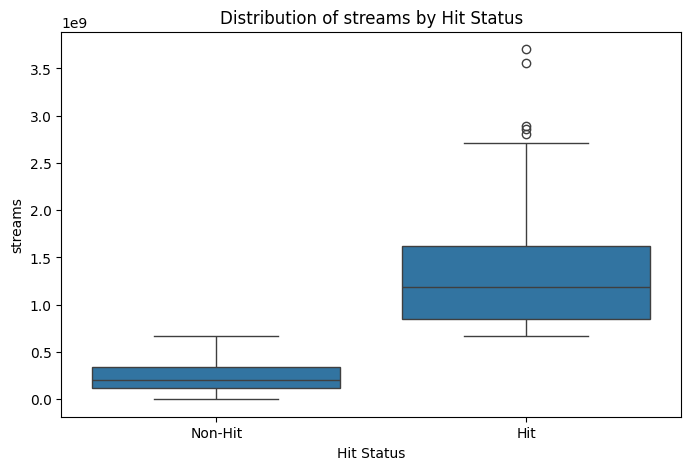

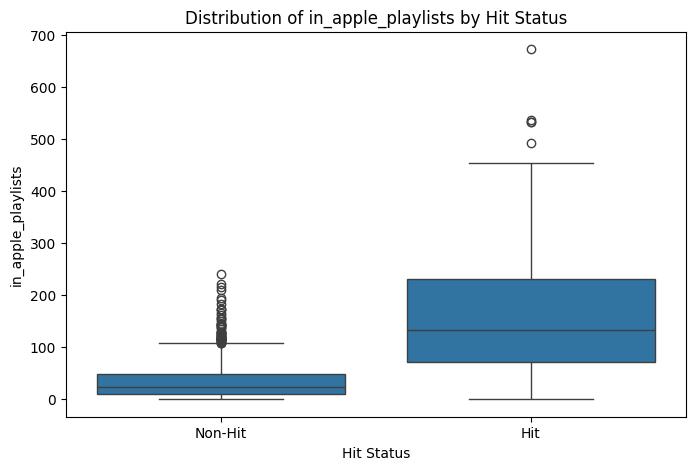

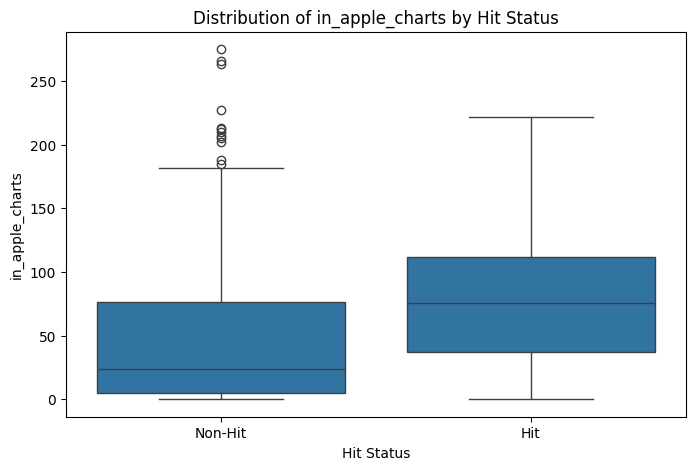

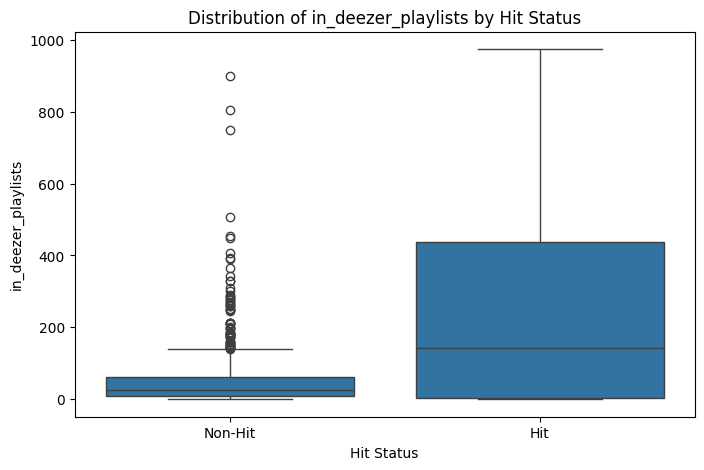

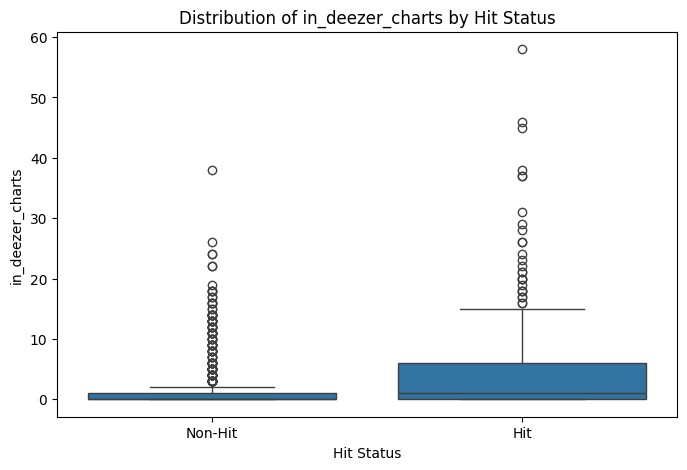

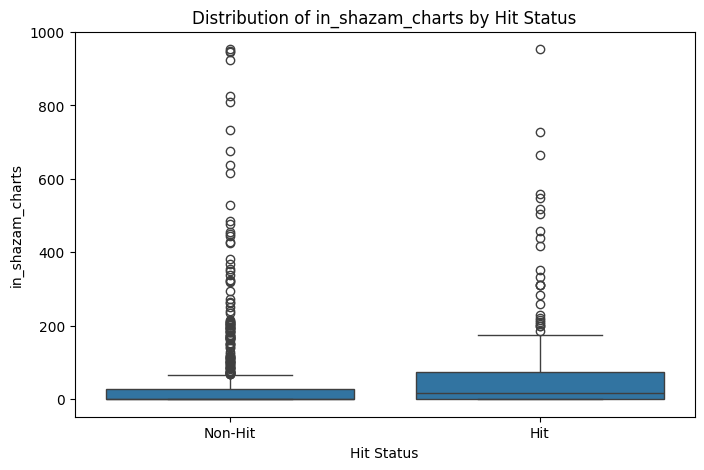

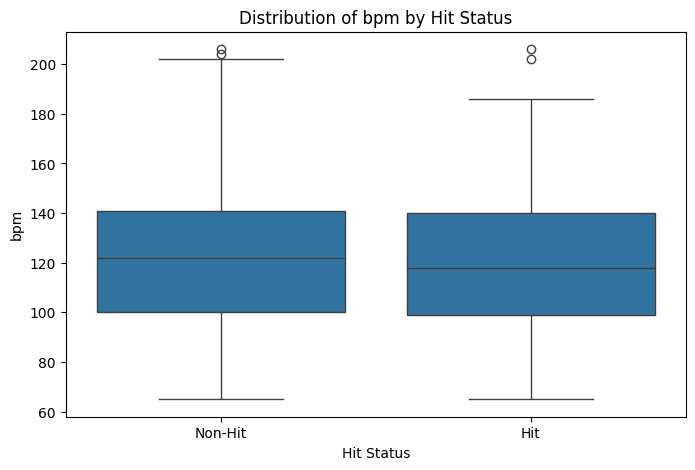

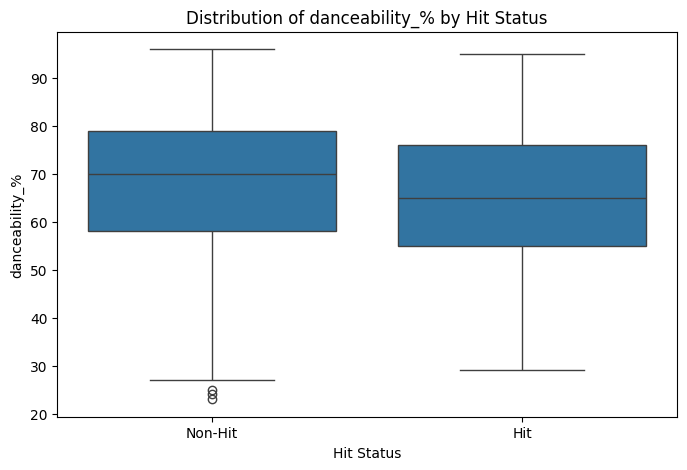

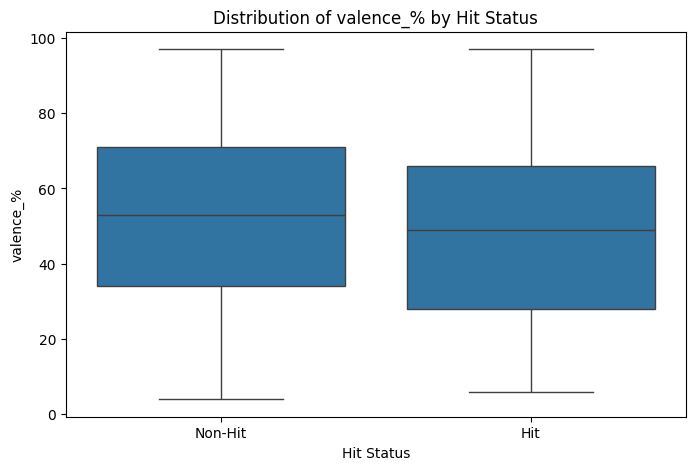

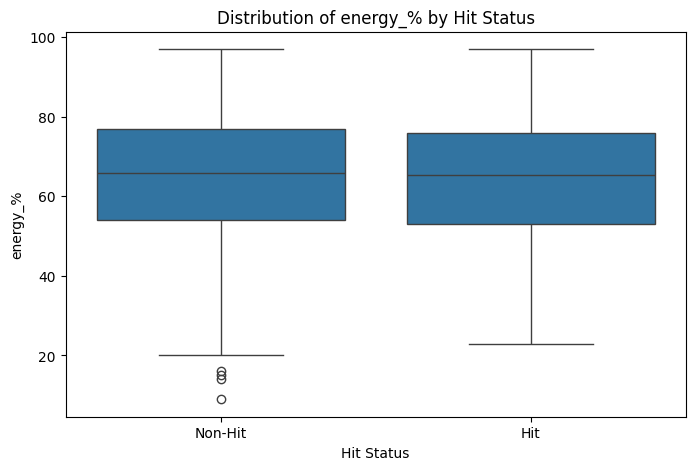

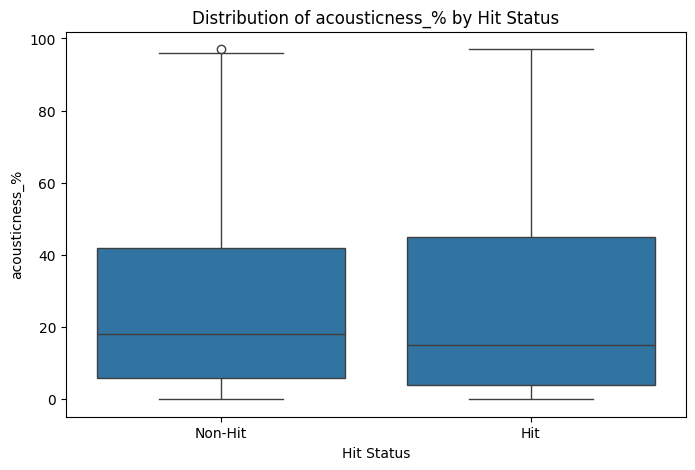

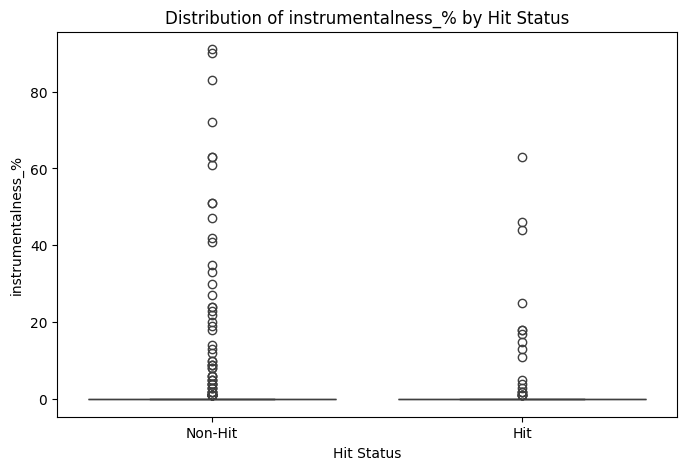

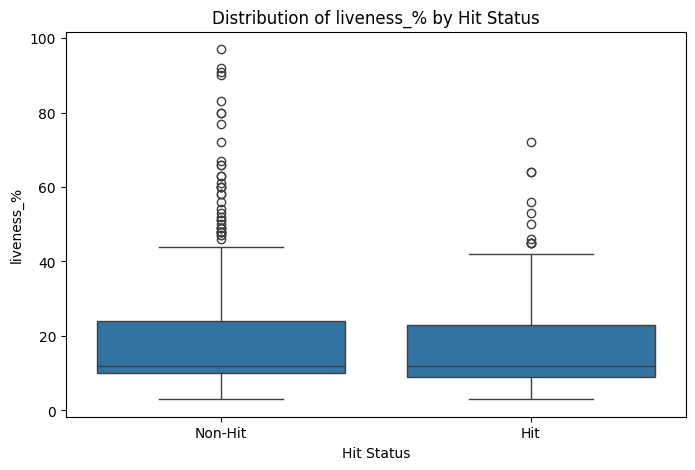

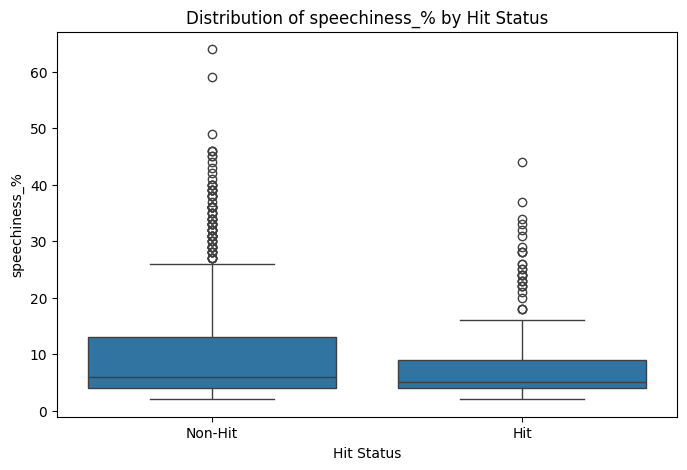

In [ ]:
for var in num_variables:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='hit_status', y=var)
    plt.title(f'Distribution of {var} by Hit Status')
    plt.xlabel('Hit Status')
    plt.ylabel(var)
    plt.show()


### 2.5.1.2 Key and Mode vs Hit_status analysis

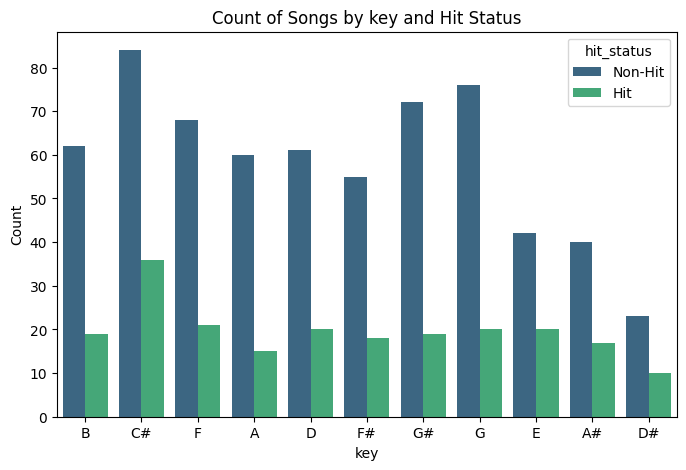

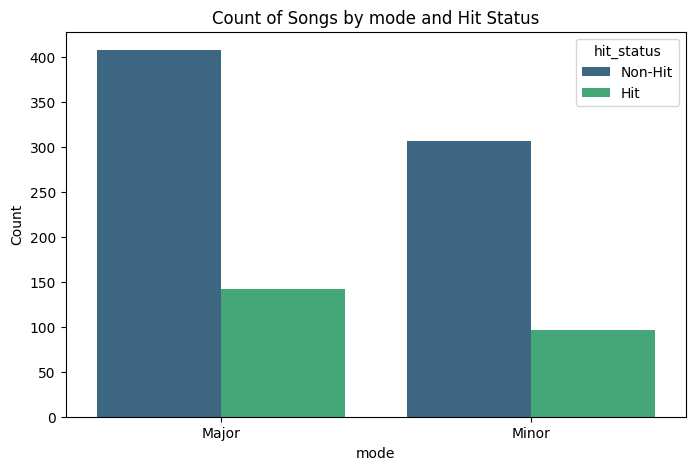

In [ ]:
# prompt: plot  countplot for all cat_variables vs hit_status , only for key and mode
for col in ['key', 'mode']:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, hue='hit_status', palette='viridis')
    plt.title(f'Count of Songs by {col} and Hit Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


### 2.5.4 Heatmap -  Numeric vs Numeric

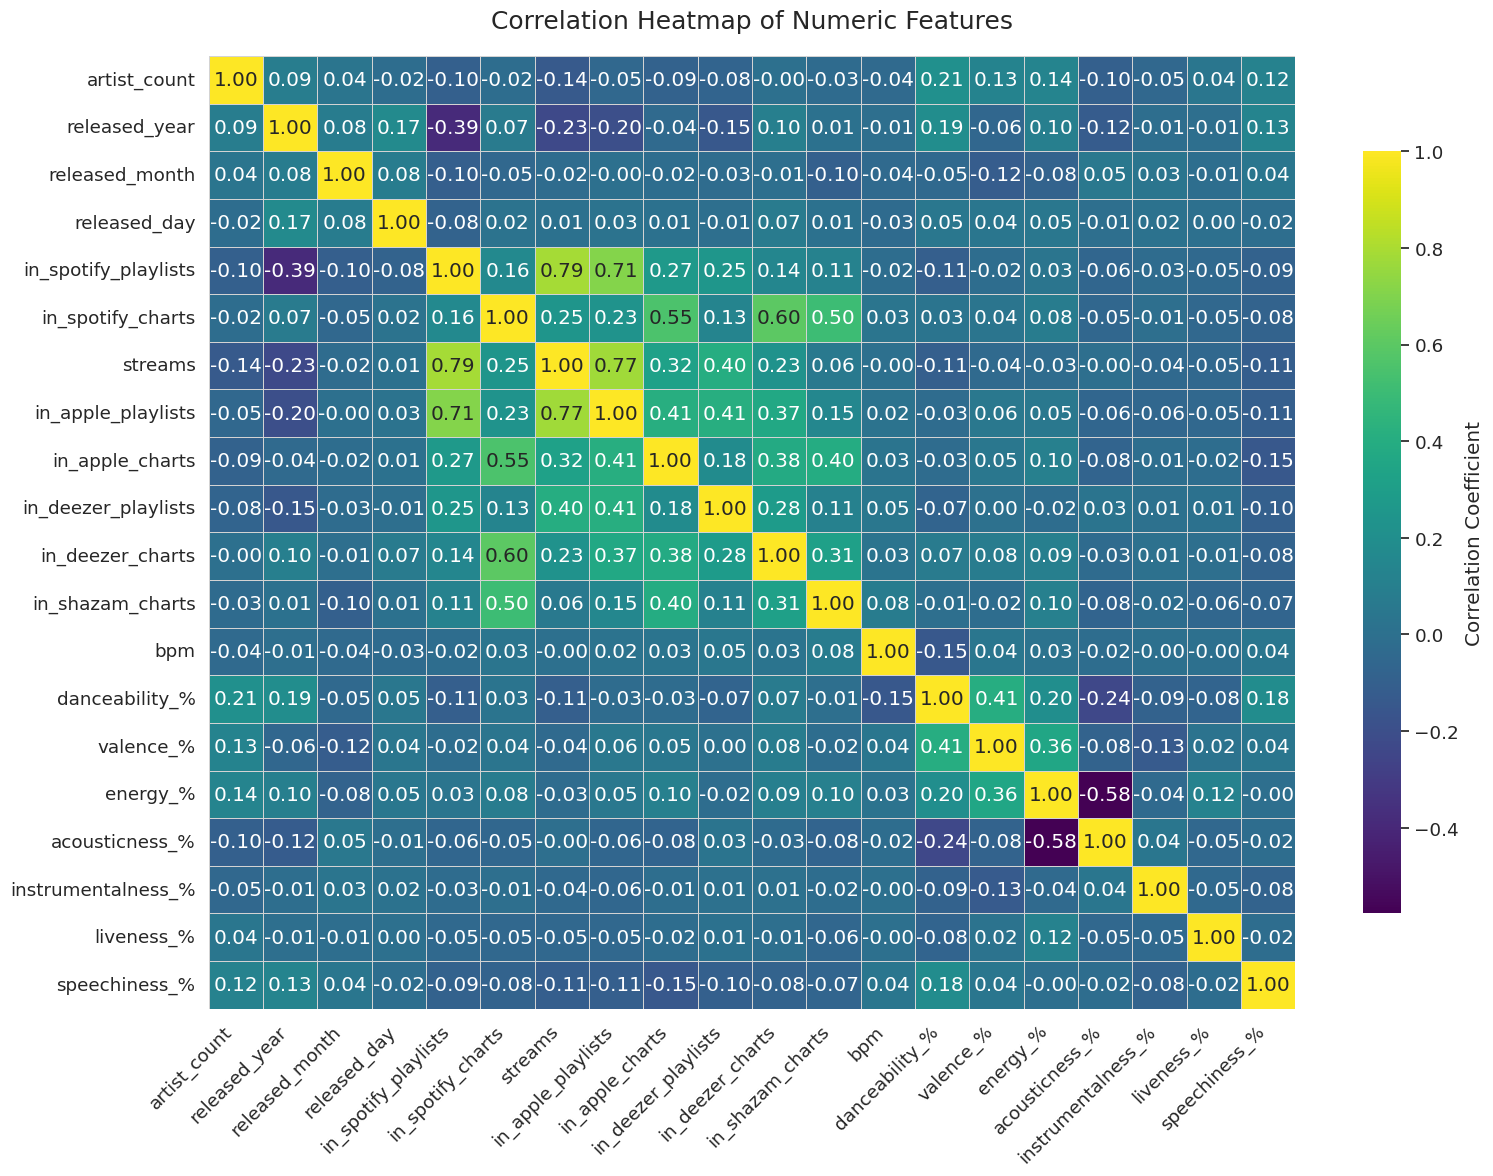

In [ ]:

plt.figure(figsize=(16, 12))  # Bigger figure for clarity
sns.set(font_scale=1.2)  # Larger font for annotations
sns.set_style("white")  # Clean white background

heatmap = sns.heatmap(
    num_variables.corr(),
    annot=True,
    cmap='viridis',     # visually appealing alternative to 'coolwarm'
    fmt=".2f",
    linewidths=0.5,
    linecolor='lightgray',
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}
)

plt.title('Correlation Heatmap of Numeric Features', fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 2.5.6 Crosstab - Categorical vs Categorical (summary table)

In [ ]:
# prompt: can you do a crosstab for cat_variables vs cat_variables add hit_status too

pd.crosstab(df['key'], [df['mode'], df['hit_status']])


mode       Major         Minor        
hit_status   Hit Non-Hit   Hit Non-Hit
key                                   
A              9      33     6      27
A#             8      19     9      21
B              6      29    13      33
C#            21      52    15      32
D             18      48     2      13
D#             4       8     6      15
E              8       9    12      33
F             10      34    11      34
F#             7      23    11      32
G             16      50     4      26
G#            17      46     2      26

## 2.5.7   Stacked Bar Plot	Two Categorical Variables Across Time/Other Dim.

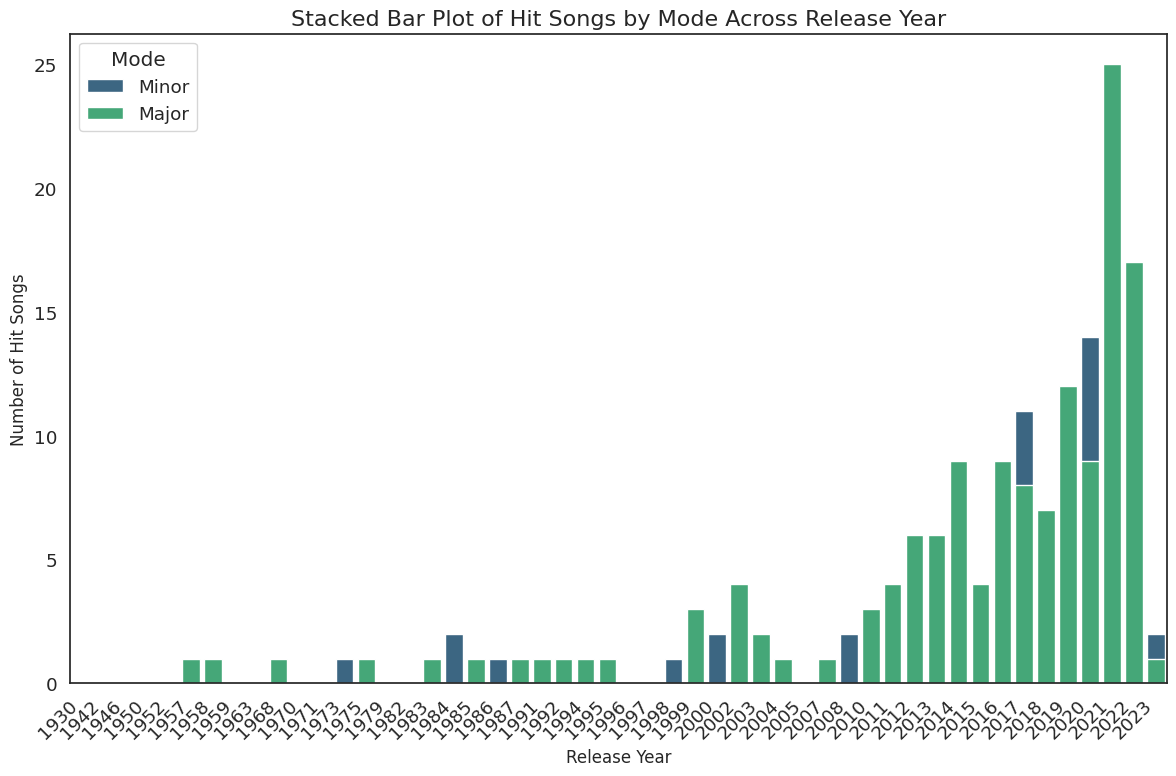

In [ ]:
# prompt: Stacked Bar Plot	Two Categorical Variables Across Time/Other Dim.

# Group data by 'released_year', 'hit_status', and the second categorical variable (e.g., 'mode')
# Count the occurrences in each group
# Unstack to get 'mode' as columns
stacked_data = df.groupby(['released_year', 'mode', 'hit_status']).size().unstack(fill_value=0).stack().reset_index(name='count')

# Optional: Filter for 'Hit' status if you only want to show hits
hit_stacked_data = stacked_data[stacked_data['hit_status'] == 'Hit']

# Create the stacked bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=hit_stacked_data, x='released_year', y='count', hue='mode', dodge=False, palette='viridis')

plt.title('Stacked Bar Plot of Hit Songs by Mode Across Release Year', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Hit Songs', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Mode')
plt.tight_layout()
plt.show()


# 3- Data Cleaning & pre processing
* 1.Dropping duplicate rows
* 2.Replacing wrong entries
* 3.Missing values imputation (SimpleImputer, fillna())
* 4.Handle outliers (IQR, Z-score method)
* 5.Encoding
* 6.Data splitting
* 7.Feature scaling: StandardScaler, MinMaxScaler
* 8.Feature selection:Based on correlation, domain knowledge, or model-based methods


In [ ]:
# prompt: make a copy of the dataset to do changes to that

df_copy = df.copy()

## 3.1 Dropping Duplicate Rows

In [ ]:
# prompt: drop duplicate rows

df_copy.drop_duplicates(inplace=True)
df_copy.duplicated().sum()

np.int64(0)

#### 3.3 Missing Values

In [ ]:
# prompt: code to drop the missing values in keys and shazam charts and 1 in strea

df_copy.dropna(subset=['key', 'in_shazam_charts', 'streams'], inplace=True)
df_copy.isnull().sum()


,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


#### 3.5 Encoding


In [ ]:

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
# prompt: gvie cod efor encoding the columns key and mode

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Select the columns to encode
columns_to_encode = ['key', 'mode']

# Initialize the OneHotEncoder
# handle_unknown='ignore' handles categories that were not seen during fit
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the selected columns
encoded_data = encoder.fit_transform(df_copy[columns_to_encode])

# Create a new DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode), index=df_copy.index)

# Concatenate the original DataFrame (excluding the original columns) with the encoded DataFrame
df_encoded = pd.concat([df_copy.drop(columns=columns_to_encode), encoded_df], axis=1)

print(df_encoded.head())


                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts      streams  in_apple_playlists  ...  key_C#  key_D  \
0                147  141381703.0            

In [ ]:
df_copy['hit_status'] = df_copy['hit_status'].map({'Hit': 1, 'Non-Hit': 0})


#### 3.6 Data Splitting

In [ ]:
# prompt: give code for data splitting

import numpy as np
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop('hit_status', axis=1) # Drop the target variable
y = df_encoded['hit_status'] # The target variable

# Identify numerical columns for splitting
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X[numerical_cols], y, test_size=0.2, random_state=23, stratify=y) # Use stratify for balanced classes

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (652, 33)
Shape of X_test: (164, 33)
Shape of y_train: (652,)
Shape of y_test: (164,)


#### 3.7 7.Feature scaling: StandardScaler, MinMaxScaler

In [ ]:
# prompt: give cod for feature scaling

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# You can now use X_train_scaled and X_test_scaled for training your model
# If you need them as DataFrames (e.g., for inspection), you can convert them back:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Scaled Training Features:")
print(X_train_scaled_df.head())
print("\nScaled Test Features:")
print(X_test_scaled_df.head())


Scaled Training Features:
     artist_count  released_year  released_month  released_day  \
838      0.473308       0.320163       -0.291260      1.420296   
632      1.607854       0.220285       -0.011169      1.097035   
11      -0.661239       0.420042        0.268921     -0.734772   
790      0.473308       0.020527       -0.291260      1.851309   
339     -0.661239       0.420042       -1.411621      1.851309   

     in_spotify_playlists  in_spotify_charts   streams  in_apple_playlists  \
838             -0.347137          -0.627688 -0.532528           -0.496275   
632              0.222459          -0.627688  0.136205            0.429348   
11              -0.566767           2.431001 -0.806417           -0.311151   
790              0.606265           0.206500  1.691112            1.341748   
339             -0.546567          -0.627688 -0.731518           -0.654954   

     in_apple_charts  in_deezer_playlists  ...    key_C#     key_D    key_D#  \
838        -0.978920        

#### 3.8  Feature Selection based on Correlation

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a quick model to get feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
selected_features_model = importances.sort_values(ascending=False).head(15).index.tolist()

print("Top 15 features based on RandomForest importance:")
print(selected_features_model)


Top 15 features based on RandomForest importance:
['streams', 'in_spotify_playlists', 'in_apple_playlists', 'released_year', 'in_deezer_playlists', 'in_apple_charts', 'in_shazam_charts', 'in_spotify_charts', 'in_deezer_charts', 'valence_%', 'danceability_%', 'liveness_%', 'released_day', 'bpm', 'acousticness_%']


# Null values Treatment general guideline:
* Check the datatype of feature:
  * If datatype== Categorical ; replace null values with mode
  * If datatype== Numerical:
    * Check for outliers:
      * If outliers are present; replace null values with median
      * If outliers are NOT present; replace null values with mean

In [ ]:
df_copy.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


In [ ]:
# prompt: gvie code to drop all null values form df_copy

df_copy.dropna(inplace=True)


In [ ]:
df_copy.to_csv('df_copy2.csv', index=False)

In [ ]:

df_copy2= pd.read_csv('df_copy2.csv')

# 4-Model Building (Regression), Evaluation & Tuning

* Regression algorithms
    * Linear Regression
    * KNN
    * Decision Trees (CART)
    * Random Forest
    * Boosting - Adaboost, Gboost, XGboost
* Model Evaluation
    * Regression metrics: MAE, MSE, RMSE, R²
* Model Tuning
    * GridSearchCV
    * RandomSearchCV

In [ ]:
# prompt: can you do model building regression and evaluation on this model

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X) and target (y) for regression
# We'll use 'streams' as the target variable for regression
X_reg = df_encoded.drop(['hit_status', 'streams'], axis=1) # Drop the classification target and original streams
y_reg = df_encoded['streams'] # The numerical target variable

# Identify numerical columns for splitting
numerical_cols_reg = X_reg.select_dtypes(include=np.number).columns.tolist()

# Split the data into training and testing sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg[numerical_cols_reg], y_reg, test_size=0.2, random_state=23)

# Scale the numerical features for regression
scaler_reg = StandardScaler()
X_train_scaled_reg = scaler_reg.fit_transform(X_train_reg)
X_test_scaled_reg = scaler_reg.transform(X_test_reg)

# Convert scaled data back to DataFrames (optional, but good for clarity)
X_train_scaled_reg_df = pd.DataFrame(X_train_scaled_reg, columns=X_train_reg.columns, index=X_train_reg.index)
X_test_scaled_reg_df = pd.DataFrame(X_test_scaled_reg, columns=X_test_reg.columns, index=X_test_reg.index)





In [ ]:
# 4-Model Building (Regression)

# Initialize Regression Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42)
}

# Train and Evaluate Regression Models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled_reg, y_train_reg)

    print(f"Evaluating {name}...")
    y_pred_reg = model.predict(X_test_scaled_reg)

    # Model Evaluation (Regression Metrics)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_reg, y_pred_reg)

    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}
    print(f"{name} Evaluation Metrics:")
    print(f"  MAE: {mae:.2f}")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R2 Score: {r2:.2f}")
    print("-" * 30)

# Display results in a DataFrame
results_df = pd.DataFrame(results).T
print("\nRegression Model Evaluation Results:")
print(results_df)

Training Linear Regression...
Evaluating Linear Regression...
Linear Regression Evaluation Metrics:
  MAE: 195137736.07
  MSE: 103258194003807696.00
  RMSE: 321338130.33
  R2 Score: 0.69
------------------------------
Training Decision Tree Regressor...
Evaluating Decision Tree Regressor...
Decision Tree Regressor Evaluation Metrics:
  MAE: 192669006.33
  MSE: 109728345529404272.00
  RMSE: 331252691.35
  R2 Score: 0.67
------------------------------
Training Random Forest Regressor...
Evaluating Random Forest Regressor...
Random Forest Regressor Evaluation Metrics:
  MAE: 145978975.40
  MSE: 65975141036919904.00
  RMSE: 256856265.33
  R2 Score: 0.80
------------------------------

Regression Model Evaluation Results:
                                  MAE           MSE          RMSE        R2
Linear Regression        1.951377e+08  1.032582e+17  3.213381e+08  0.692703
Decision Tree Regressor  1.926690e+08  1.097283e+17  3.312527e+08  0.673448
Random Forest Regressor  1.459790e+08  6.5975

In [ ]:
# 5- Model Tuning (Example with GridSearchCV for Random Forest Regressor)
# This can be computationally intensive, so we'll use a simple example with limited parameters

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error', # Use a scoring suitable for regression
                           cv=3, # Number of cross-validation folds
                           n_jobs=-1, # Use all available CPU cores
                           verbose=1)

print("Starting GridSearchCV for Random Forest Regressor...")
grid_search.fit(X_train_scaled_reg, y_train_reg)

print("\nBest parameters found:")
print(grid_search.best_params_)

print("\nBest RMSE found:")
# Note: GridSearchCV scores are typically negative for minimization problems,
# so we take the absolute value and sqrt to get RMSE
best_rmse = np.sqrt(-grid_search.best_score_)
print(f"{best_rmse:.2f}")

# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled_reg)

best_rf_mae = mean_absolute_error(y_test_reg, y_pred_best_rf)
best_rf_mse = mean_squared_error(y_test_reg, y_pred_best_rf)
best_rf_rmse = np.sqrt(best_rf_mse)
best_rf_r2 = r2_score(y_test_reg, y_pred_best_rf)

print("\nEvaluation of the Best Tuned Random Forest Regressor on Test Set:")
print(f"  MAE: {best_rf_mae:.2f}")
print(f"  MSE: {best_rf_mse:.2f}")
print(f"  RMSE: {best_rf_rmse:.2f}")
print(f"  R2 Score: {best_rf_r2:.2f}")


Starting GridSearchCV for Random Forest Regressor...
Fitting 3 folds for each of 27 candidates, totalling 81 fits

Best parameters found:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

Best RMSE found:
244061263.40

Evaluation of the Best Tuned Random Forest Regressor on Test Set:
  MAE: 147521374.40
  MSE: 66373003615944408.00
  RMSE: 257629586.06
  R2 Score: 0.80


# 5-Model Building (Classification), Evaluation & Tuning
* Data splitting
* Classification algorithms
    * Logistic Regression
    * Naive Bayes, KNN
    * Decision Trees (CART)
    * Random Forest
    * Boosting - Adaboost, Gboost, XGboost
* Model Evaluation
    * Classification metrics:Accuracy, Precision, Recall, F1-score, Confusion matrix,ROC Curve, AUC
* Model Tuning
    * GridSearchCV
    * RandomSearchCV

In [ ]:
# prompt: Simmilaely can you do model building( Classification ) , evaluation and tuning

import pandas as pd
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train_scaled and X_test_scaled (for classification) are already defined from the previous section
# X_train_scaled, X_test_scaled, y_train, y_test

# Convert y_train and y_test to numerical labels if they are strings
# If y is 'Hit'/'Non-Hit', convert to 1/0
y_train_numeric = y_train.apply(lambda x: 1 if x == 'Hit' else 0)
y_test_numeric = y_test.apply(lambda x: 1 if x == 'Hit' else 0)


# 5-Model Building (Classification)

# Initialize Classification Models
classification_models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'), # Use liblinear for smaller datasets
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'AdaBoost Classifier': AdaBoostClassifier(random_state=42),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=42),
    'XGBoost Classifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42) # Add eval_metric for newer versions
}


Training Logistic Regression...
Evaluating Logistic Regression...
Logistic Regression Evaluation Metrics:
  Accuracy: 0.99
  Precision: 1.00
  Recall: 0.94
  F1-score: 0.97
  AUC: 1.00

Confusion Matrix:
[[128   0]
 [  2  34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       128
           1       1.00      0.94      0.97        36

    accuracy                           0.99       164
   macro avg       0.99      0.97      0.98       164
weighted avg       0.99      0.99      0.99       164

------------------------------
Training Naive Bayes...
Evaluating Naive Bayes...
Naive Bayes Evaluation Metrics:
  Accuracy: 0.93
  Precision: 0.79
  Recall: 0.92
  F1-score: 0.85
  AUC: 0.98

Confusion Matrix:
[[119   9]
 [  3  33]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       128
           1       0.79      0.92      0.85        36



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:29:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluating XGBoost Classifier...
XGBoost Classifier Evaluation Metrics:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1-score: 1.00
  AUC: 1.00

Confusion Matrix:
[[128   0]
 [  0  36]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        36

    accuracy                           1.00       164
   macro avg       1.00      1.00      1.00       164
weighted avg       1.00      1.00      1.00       164

------------------------------

Classification Model Evaluation Results:
                              Accuracy  Precision    Recall  F1-score  \
Logistic Regression           0.987805   1.000000  0.944444  0.971429   
Naive Bayes                   0.926829   0.785714  0.916667  0.846154   
KNN                           0.896341   0.913043  0.583333  0.711864   
Decision Tree Classifier      0.993902   1.000000  0.972222  0.985915   
Random Forest Clas

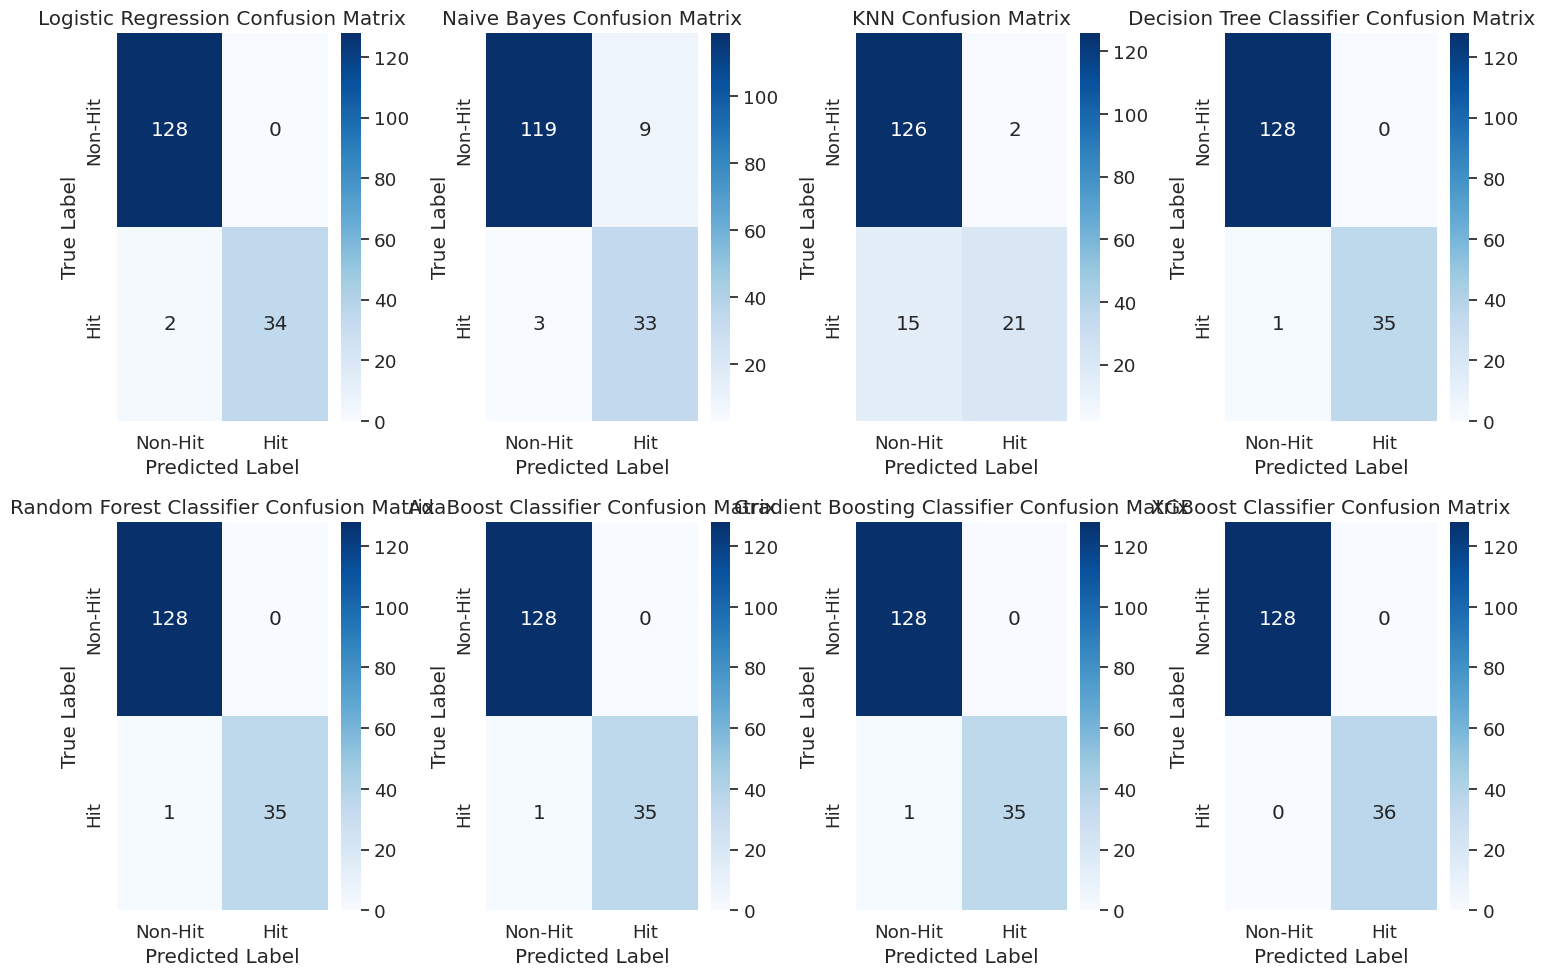

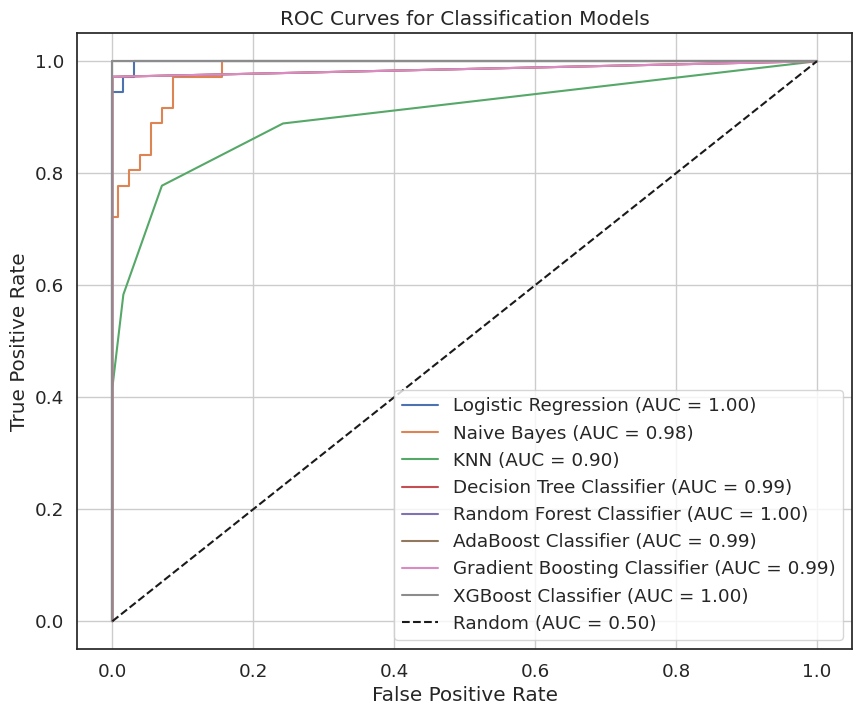

In [ ]:
# Train and Evaluate Classification Models
classification_results = {}
confusion_matrices = {}
roc_curves = {}

for name, model in classification_models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train_numeric)

    print(f"Evaluating {name}...")
    y_pred_cls = model.predict(X_test_scaled)
    y_proba_cls = model.predict_proba(X_test_scaled)[:, 1] # Probability of the positive class (1: Hit)

    # Model Evaluation (Classification Metrics)
    accuracy = accuracy_score(y_test_numeric, y_pred_cls)
    precision = precision_score(y_test_numeric, y_pred_cls)
    recall = recall_score(y_test_numeric, y_pred_cls)
    f1 = f1_score(y_test_numeric, y_pred_cls)
    cm = confusion_matrix(y_test_numeric, y_pred_cls)
    fpr, tpr, thresholds = roc_curve(y_test_numeric, y_proba_cls)
    roc_auc = auc(fpr, tpr)

    classification_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'AUC': roc_auc
    }
    confusion_matrices[name] = cm
    roc_curves[name] = (fpr, tpr)

    print(f"{name} Evaluation Metrics:")
    print(f"  Accuracy: {accuracy:.2f}")
    print(f"  Precision: {precision:.2f}")
    print(f"  Recall: {recall:.2f}")
    print(f"  F1-score: {f1:.2f}")
    print(f"  AUC: {roc_auc:.2f}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test_numeric, y_pred_cls))
    print("-" * 30)

# Display classification results in a DataFrame
classification_results_df = pd.DataFrame(classification_results).T
print("\nClassification Model Evaluation Results:")
print(classification_results_df)

# Plot Confusion Matrices
plt.figure(figsize=(15, 10))
for i, (name, cm) in enumerate(confusion_matrices.items()):
    plt.subplot(2, 4, i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hit', 'Hit'], yticklabels=['Non-Hit', 'Hit'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Plot ROC Curves
plt.figure(figsize=(10, 8))
for name, (fpr, tpr) in roc_curves.items():
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classification Models')
plt.legend()
plt.grid(True)
plt.show()


# Model Tuning

In [ ]:
# 6- Model Tuning (Example with GridSearchCV for Random Forest Classifier)
# This can be computationally intensive, so we'll use a simple example with limited parameters


# Define the parameter grid
param_grid_cls = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search_cls = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_cls,
                              scoring='accuracy', # Use a scoring suitable for classification
                              cv=3, # Number of cross-validation folds
                              n_jobs=-1, # Use all available CPU cores
                              verbose=1)

print("Starting GridSearchCV for Random Forest Classifier...")
grid_search_cls.fit(X_train_scaled, y_train_numeric)

print("\nBest parameters found:")
print(grid_search_cls.best_params_)

print("\nBest cross-validation accuracy found:")
print(f"{grid_search_cls.best_score_:.2f}")


Starting GridSearchCV for Random Forest Classifier...
Fitting 3 folds for each of 81 candidates, totalling 243 fits

Best parameters found:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}

Best cross-validation accuracy found:
1.00


In [ ]:
# Evaluate the best model on the test set
best_rf_model_cls = grid_search_cls.best_estimator_
y_pred_best_rf_cls = best_rf_model_cls.predict(X_test_scaled)

best_rf_accuracy_cls = accuracy_score(y_test_numeric, y_pred_best_rf_cls)
best_rf_precision_cls = precision_score(y_test_numeric, y_pred_best_rf_cls)
best_rf_recall_cls = recall_score(y_test_numeric, y_pred_best_rf_cls)
best_rf_f1_cls = f1_score(y_test_numeric, y_pred_best_rf_cls)
best_rf_cm_cls = confusion_matrix(y_test_numeric, y_pred_best_rf_cls)
best_rf_fpr_cls, best_rf_tpr_cls, _ = roc_curve(y_test_numeric, best_rf_model_cls.predict_proba(X_test_scaled)[:, 1])
best_rf_auc_cls = auc(best_rf_fpr_cls, best_rf_tpr_cls)


print("\nEvaluation of the Best Tuned Random Forest Classifier on Test Set:")
print(f"  Accuracy: {best_rf_accuracy_cls:.2f}")
print(f"  Precision: {best_rf_precision_cls:.2f}")
print(f"  Recall: {best_rf_recall_cls:.2f}")
print(f"  F1-score: {best_rf_f1_cls:.2f}")
print(f"  AUC: {best_rf_auc_cls:.2f}")
print("\nConfusion Matrix:")
print(best_rf_cm_cls)
print("\nClassification Report:")
print(classification_report(y_test_numeric, y_pred_best_rf_cls))


Evaluation of the Best Tuned Random Forest Classifier on Test Set:
  Accuracy: 0.99
  Precision: 1.00
  Recall: 0.97
  F1-score: 0.99
  AUC: 1.00

Confusion Matrix:
[[128   0]
 [  1  35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       128
           1       1.00      0.97      0.99        36

    accuracy                           0.99       164
   macro avg       1.00      0.99      0.99       164
weighted avg       0.99      0.99      0.99       164



In [ ]:
# Example with RandomizedSearchCV (Less computationally intensive for exploring hyperparameter space)

# Define the parameter distributions
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 30), # None implies unlimited depth
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Initialize RandomizedSearchCV
random_search_cls = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                       param_distributions=param_dist,
                                       n_iter=10, # Number of parameter settings that are sampled
                                       scoring='accuracy',
                                       cv=3,
                                       n_jobs=-1,
                                       random_state=42,
                                       verbose=1)

print("\nStarting RandomizedSearchCV for Random Forest Classifier...")
random_search_cls.fit(X_train_scaled, y_train_numeric)

print("\nBest parameters found (Randomized Search):")
print(random_search_cls.best_params_)

print("\nBest cross-validation accuracy found (Randomized Search):")
print(f"{random_search_cls.best_score_:.2f}")

# Evaluate the best model from Randomized Search on the test set
best_rf_model_rs = random_search_cls.best_estimator_
y_pred_best_rf_rs = best_rf_model_rs.predict(X_test_scaled)

best_rf_accuracy_rs = accuracy_score(y_test_numeric, y_pred_best_rf_rs)
best_rf_precision_rs = precision_score(y_test_numeric, y_pred_best_rf_rs)
best_rf_recall_rs = recall_score(y_test_numeric, y_pred_best_rf_rs)
best_rf_f1_rs = f1_score(y_test_numeric, y_pred_best_rf_rs)


print("\nEvaluation of the Best Tuned Random Forest Classifier (Randomized Search) on Test Set:")
print(f"  Accuracy: {best_rf_accuracy_rs:.2f}")
print(f"  Precision: {best_rf_precision_rs:.2f}")
print(f"  Recall: {best_rf_recall_rs:.2f}")
print(f"  F1-score: {best_rf_f1_rs:.2f}")
print("\nClassification Report:")
print(classification_report(y_test_numeric, y_pred_best_rf_rs))


Starting RandomizedSearchCV for Random Forest Classifier...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best parameters found (Randomized Search):
{'max_depth': 25, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 180}

Best cross-validation accuracy found (Randomized Search):
1.00

Evaluation of the Best Tuned Random Forest Classifier (Randomized Search) on Test Set:
  Accuracy: 0.99
  Precision: 1.00
  Recall: 0.97
  F1-score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       128
           1       1.00      0.97      0.99        36

    accuracy                           0.99       164
   macro avg       1.00      0.99      0.99       164
weighted avg       0.99      0.99      0.99       164



## Model tuning and Hyperparameter Training

In [ ]:
# prompt: can you give code for it's hyperparameter tuning

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from scipy.stats import randint
import numpy as np

# Assuming X_train_scaled and X_test_scaled (for classification) are already defined
# and y_train_numeric and y_test_numeric contain the numerical labels (0/1)

# Model Tuning (Example with GridSearchCV for Random Forest Classifier)
# This can be computationally intensive, so we'll use a simple example with limited parameters


# Define the parameter grid for GridSearchCV
param_grid_cls_gs = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search_cls = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_cls_gs,
                              scoring='accuracy', # Use a scoring suitable for classification
                              cv=3, # Number of cross-validation folds
                              n_jobs=-1, # Use all available CPU cores
                              verbose=1)

print("Starting GridSearchCV for Random Forest Classifier...")
grid_search_cls.fit(X_train_scaled, y_train_numeric)

print("\nBest parameters found (Grid Search):")
print(grid_search_cls.best_params_)

print("\nBest cross-validation accuracy found (Grid Search):")
print(f"{grid_search_cls.best_score_:.2f}")

# Evaluate the best model from Grid Search on the test set
best_rf_model_gs = grid_search_cls.best_estimator_
y_pred_best_rf_gs = best_rf_model_gs.predict(X_test_scaled)

best_rf_accuracy_gs = accuracy_score(y_test_numeric, y_pred_best_rf_gs)
best_rf_precision_gs = precision_score(y_test_numeric, y_pred_best_rf_gs)
best_rf_recall_gs = recall_score(y_test_numeric, y_pred_best_rf_gs)
best_rf_f1_gs = f1_score(y_test_numeric, y_pred_best_rf_gs)


print("\nEvaluation of the Best Tuned Random Forest Classifier (Grid Search) on Test Set:")
print(f"  Accuracy: {best_rf_accuracy_gs:.2f}")
print(f"  Precision: {best_rf_precision_gs:.2f}")
print(f"  Recall: {best_rf_recall_gs:.2f}")
print(f"  F1-score: {best_rf_f1_gs:.2f}")
print("\nClassification Report:")
print(classification_report(y_test_numeric, y_pred_best_rf_gs))


# Example with RandomizedSearchCV (Less computationally intensive for exploring hyperparameter space)

# Define the parameter distributions for RandomizedSearchCV
param_dist_cls_rs = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 30), # None implies unlimited depth, but a range is often better for search
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Initialize RandomizedSearchCV
random_search_cls = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                       param_distributions=param_dist_cls_rs,
                                       n_iter=10, # Number of parameter settings that are sampled (adjust as needed)
                                       scoring='accuracy',
                                       cv=3,
                                       n_jobs=-1,
                                       random_state=42,
                                       verbose=1)

print("\nStarting RandomizedSearchCV for Random Forest Classifier...")
random_search_cls.fit(X_train_scaled, y_train_numeric)

print("\nBest parameters found (Randomized Search):")
print(random_search_cls.best_params_)

print("\nBest cross-validation accuracy found (Randomized Search):")
print(f"{random_search_cls.best_score_:.2f}")

# Evaluate the best model from Randomized Search on the test set
best_rf_model_rs = random_search_cls.best_estimator_
y_pred_best_rf_rs = best_rf_model_rs.predict(X_test_scaled)

best_rf_accuracy_rs = accuracy_score(y_test_numeric, y_pred_best_rf_rs)
best_rf_precision_rs = precision_score(y_test_numeric, y_pred_best_rf_rs)
best_rf_recall_rs = recall_score(y_test_numeric, y_pred_best_rf_rs)
best_rf_f1_rs = f1_score(y_test_numeric, y_pred_best_rf_rs)


print("\nEvaluation of the Best Tuned Random Forest Classifier (Randomized Search) on Test Set:")
print(f"  Accuracy: {best_rf_accuracy_rs:.2f}")
print(f"  Precision: {best_rf_precision_rs:.2f}")
print(f"  Recall: {best_rf_recall_rs:.2f}")
print(f"  F1-score: {best_rf_f1_rs:.2f}")
print("\nClassification Report:")
print(classification_report(y_test_numeric, y_pred_best_rf_rs))


Starting GridSearchCV for Random Forest Classifier...
Fitting 3 folds for each of 81 candidates, totalling 243 fits

Best parameters found (Grid Search):
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}

Best cross-validation accuracy found (Grid Search):
1.00

Evaluation of the Best Tuned Random Forest Classifier (Grid Search) on Test Set:
  Accuracy: 0.99
  Precision: 1.00
  Recall: 0.97
  F1-score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       128
           1       1.00      0.97      0.99        36

    accuracy                           0.99       164
   macro avg       1.00      0.99      0.99       164
weighted avg       0.99      0.99      0.99       164


Starting RandomizedSearchCV for Random Forest Classifier...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best parameters found (Randomized Search):
{'max_depth': 25, 'min_samples_le